<a href="https://colab.research.google.com/github/Monique-199/FaceRecognition/blob/main/FRModel2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_dir=('/content/drive/MyDrive/dataset')

In [ ]:
import os
from pathlib import Path

In [ ]:
# Converting the string to a Path object
dataset_dir = Path(dataset_dir)

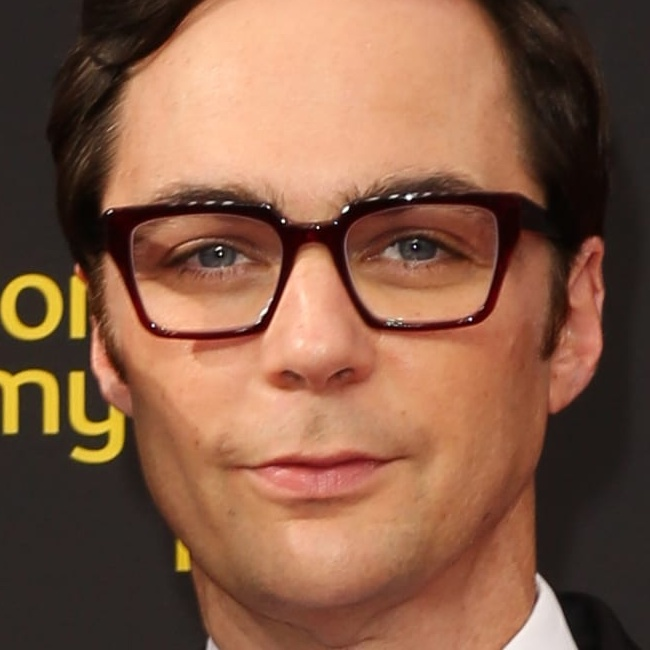

In [ ]:
Jim_Parsons= list(dataset_dir.glob('Jim_Parsons/*'))
PIL.Image.open(str(Jim_Parsons[0]))

In [ ]:
#parameters for the loader
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.4,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 16065 files belonging to 31 classes.
Using 9639 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir,
  validation_split=0.4,

  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 16065 files belonging to 31 classes.
Using 6426 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Courteney_Cox', 'David_Schwimmer', 'Jennifer_Aniston', 'Jim_Parsons', 'Johnny_Galeck', 'Kunal_Nayya', 'Lisa_Kudrow', 'Matt_LeBlanc', 'Matthew_Perry', 'Pankaj_Tripathi', 'ROHIT_SHARMA', 'Sachin_Tendulka', 'Simon_Helberg', 'aishwarya_rai', 'angelina_jolie', 'arnold_schwarzenegger', 'bhuvan_bam', 'brad_pitt', 'dhoni', 'hardik_pandya', 'kerubo_Monicah', 'manoj_bajpayee', 'messi', 'mohamed_ali', 'pewdiepie', 'random_person', 'ronaldo', 'scarlett_johansson', 'suresh_raina', 'sylvester_stallone', 'virat_kohli']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#STANDARDIZING VALUES
normalization_layer = layers.Rescaling(1./255)

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

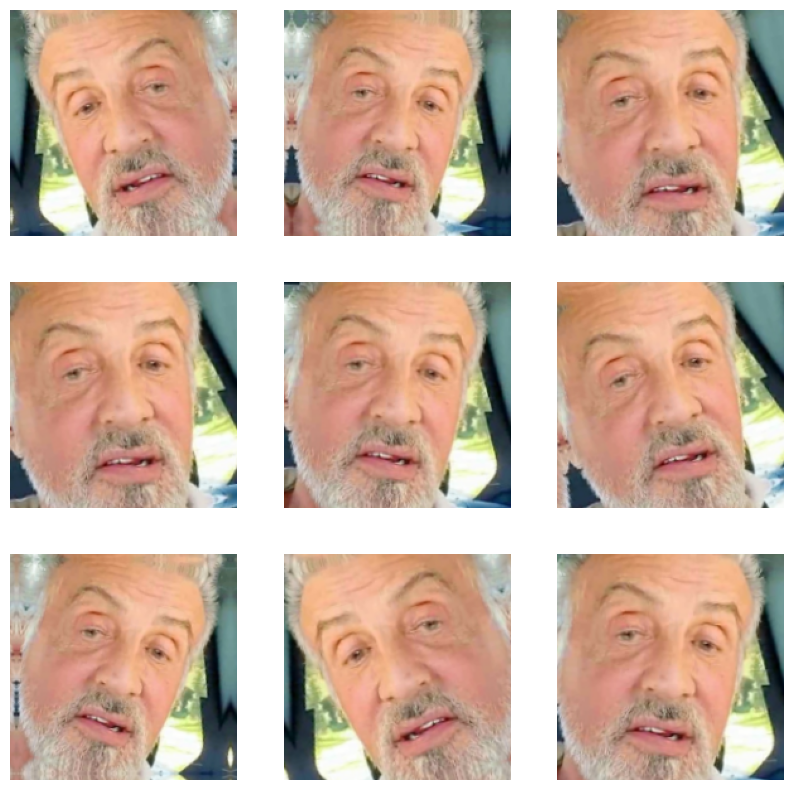

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in val_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
#building the model architecture
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential

num_classes = len(class_names)

model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Add more convolutional layers
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    #layers.Dropout(0.2),
    layers.Dense(num_classes)
])

In [ ]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [17]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
302/302 [==============================] - 1987s 4s/step - loss: 3.0677 - accuracy: 0.1523 - val_loss: 2.6116 - val_accuracy: 0.2331
Epoch 2/10
302/302 [==============================] - 614s 2s/step - loss: 2.4771 - accuracy: 0.2624 - val_loss: 2.1040 - val_accuracy: 0.3701
Epoch 3/10
302/302 [==============================] - 561s 2s/step - loss: 2.0687 - accuracy: 0.3815 - val_loss: 1.7897 - val_accuracy: 0.4613
Epoch 4/10
302/302 [==============================] - 617s 2s/step - loss: 1.7544 - accuracy: 0.4767 - val_loss: 1.5235 - val_accuracy: 0.5467
Epoch 5/10
302/302 [==============================] - 558s 2s/step - loss: 1.5259 - accuracy: 0.5579 - val_loss: 1.3068 - val_accuracy: 0.6237
Epoch 6/10
302/302 [==============================] - 559s 2s/step - loss: 1.3158 - accuracy: 0.6198 - val_loss: 1.1880 - val_accuracy: 0.6617
Epoch 7/10
302/302 [==============================] - 559s 2s/step - loss: 1.1926 - accuracy: 0.6613 - val_loss: 1.0816 - val_accuracy: 0.689

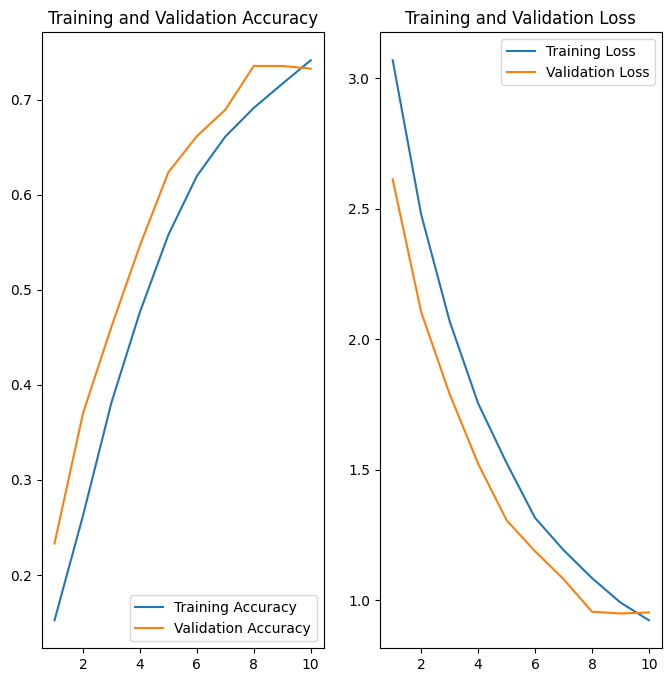

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

#epochs_range = range(1, 19)
epochs_range = range(1, len(acc) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
#plt.ylim(0, 1)
plt.show()